In [1]:
import scanpy as sc
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter, defaultdict
from scipy.sparse import csr_matrix
from scipy import sparse
import itertools as it
import anndata as ad
from utils import *

In [2]:
FILE = "datasets/10XGenomics/Targeted_SC3v3_Human_Glioblastoma_Neuroscience_filtered_feature_bc_matrix.h5"
# FILE = "datasets/10XGenomics/Human_PBMCs_Next_GEM_Flex_GEM-X_Flex_Comparison_count_filtered_feature_bc_matrix.h5"

In [3]:
adata = sc.read_10x_h5(FILE)
X = adata.X.todense()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [14]:
# def get_leiden_graph(file, bins):
#     adata = ad.AnnData(reclassify(sc.read_10x_h5(file).X.todense(), bins))
#     print("a")
#     l = get_leiden(adata)
#     print("b")
#     return adata
#     # sc.pl.umap(adata, color=['leiden'])

In [24]:
# adata = ad.AnnData(reclassify(sc.read_10x_h5(FILE).X.todense(), 100))
# sc.pp.calculate_qc_metrics(adata, qc_vars=[], percent_top=None, log1p=False, inplace=True)
# upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
# adata = adata[adata.obs.n_genes_by_counts < upper_lim]
# adata.X.sum(axis = 1)
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
# sc.pp.highly_variable_genes(adata, n_top_genes = 2000)
# adata = adata[:, adata.var.highly_variable]
# sc.pp.regress_out(adata, ['total_counts'])
# sc.pp.scale(adata, max_value=10)
# sc.tl.pca(adata, svd_solver='arpack')
# sc.pp.neighbors(adata, n_pcs = 30)
# sc.tl.umap(adata)
# sc.tl.leiden(adata, resolution = 0.5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:414: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.

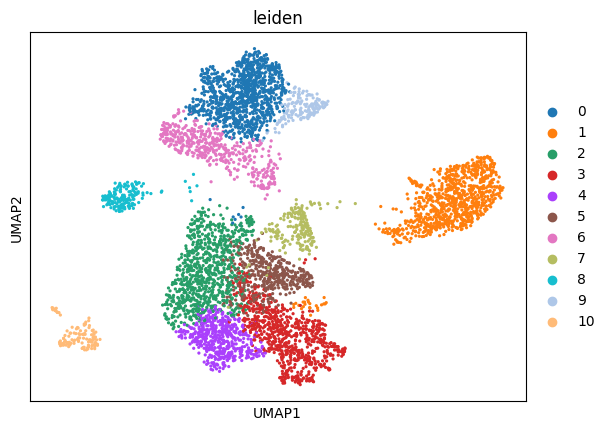

In [25]:
sc.pl.umap(adata, color=['leiden'])

In [17]:
a = get_leiden_graph(FILE, 1)
sc.pl.umap(a, color=['leiden'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


a


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:414: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:710: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/utils.py:27: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
 

b


KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [18]:
a

AnnData object with n_obs × n_vars = 5697 × 1186
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [4]:
cuts = {}
def get_optimal_cut(file, lo=3, hi=127):
    adata_uncut = sc.read_10x_h5(file)
    l1 = get_leiden(adata_uncut)
    best_score, best_cut = None, None
    for n in tqdm.trange(lo, hi + 1):
        adata_cut = ad.AnnData(reclassify(sc.read_10x_h5(file).X.todense(), n))
        l2 = get_leiden(adata_cut)
        score = compare_leidens(l1, l2)
        cuts[n] = score
        if best_score is None or score > best_score:
            best_score = score
            best_cut = n
    print(f"Best cut: {best_cut} with score={best_score}")
    return best_cut

In [5]:
get_optimal_cut(FILE)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 

Best cut: 105 with score=0.8967926894821716


105

In [111]:
cuts

{3: 0.6794481275757033,
 4: 0.6850026876903781,
 5: 0.6686973660634294,
 6: 0.6857194051245297,
 7: 0.7428776204981186,
 8: 0.7495072567640207,
 9: 0.7720838559397958,
 10: 0.6923490413904319,
 11: 0.7142089231320552,
 12: 0.6900197097294392,
 13: 0.7138505644149794,
 14: 0.66439706145852,
 15: 0.7224511736247984,
 16: 0.7203010213223436,
 17: 0.7136713850564415,
 18: 0.688765454219674,
 19: 0.7263931195126322,
 20: 0.6579466045511557,
 21: 0.7478946425371797,
 22: 0.77853431284716,
 23: 0.7151048199247446,
 24: 0.7004121125246372,
 25: 0.7206593800394194,
 26: 0.747357104461566,
 27: 0.7434151585737323,
 28: 0.6905572478050529,
 29: 0.7136713850564415,
 30: 0.7050707758466225,
 31: 0.7050707758466225,
 32: 0.6916323239562803,
 33: 0.6998745744490235,
 34: 0.7426984411395807,
 35: 0.740369109478588,
 36: 0.740369109478588,
 37: 0.7575703278982261,
 38: 0.7641999641641283,
 39: 0.7641999641641283,
 40: 0.7152839992832826,
 41: 0.71976348324673,
 42: 0.71976348324673,
 43: 0.744669414083

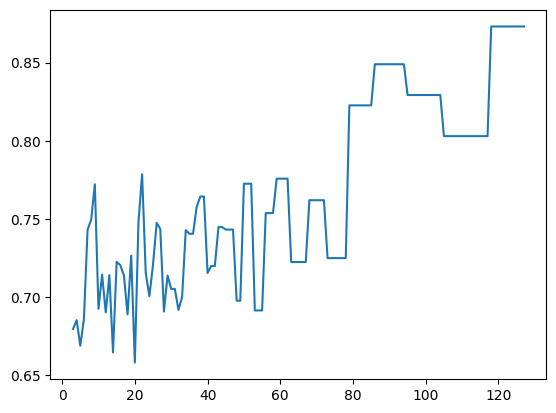

In [112]:
plt.plot(cuts.keys(), cuts.values())

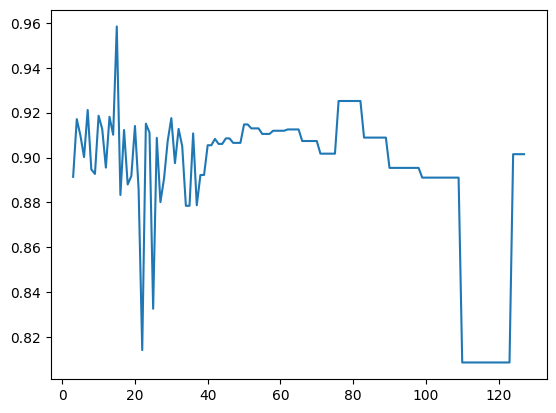

In [117]:
plt.plot(cuts2.keys(), cuts2.values())